In [ ]:
# 2번
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# 픽셀 값 변환 (0~1)
X_train = X_train/255.0
X_test = X_test/255.0

print("===================Train==================")
print("cifar10 = ", X_train.shape)
print("cifar10 = ", y_train.shape)
print("===================Test==================")
print("cifar10 = ", X_test.shape)
print("cifar10 = ", y_test.shape)

# CNN
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, verbose=1,
validation_split=0.3)

===================Train==================
cifar10 =  (50000, 32, 32, 3)
cifar10 =  (50000, 1)
===================Test==================
cifar10 =  (10000, 32, 32, 3)
cifar10 =  (10000, 1)
Epoch 1/10
1094/1094 [==============================] - 78s 71ms/step - loss: 1.5145 - accuracy: 0.4481 - val_loss: 1.2674 - val_accuracy: 0.5499
Epoch 2/10
1094/1094 [==============================] - 75s 68ms/step - loss: 1.1787 - accuracy: 0.5839 - val_loss: 1.1252 - val_accuracy: 0.6064
Epoch 3/10
1094/1094 [==============================] - 74s 68ms/step - loss: 1.0210 - accuracy: 0.6455 - val_loss: 1.0696 - val_accuracy: 0.6242
Epoch 4/10
1094/1094 [==============================] - 78s 71ms/step - loss: 0.9113 - accuracy: 0.6790 - val_loss: 1.0671 - val_accuracy: 0.6281
Epoch 5/10
1094/1094 [==============================] - 75s 69ms/step - loss: 0.8262 - accuracy: 0.7143 - val_loss: 1.0330 - val_accuracy: 0.6486
Epoch 6/10
1094/1094 [==============================] - 75s 69ms/step - loss: 0.7

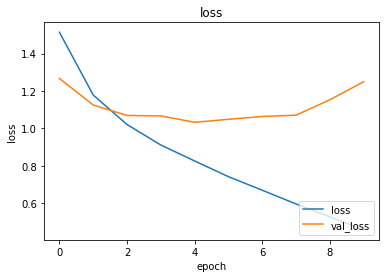

In [ ]:
# loss graph (CNN)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

In [ ]:
# DNN
model2 = Sequential()
model2.add(Flatten(input_shape=(32, 32, 3)))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=10, verbose=1,
validation_split=0.3) 

Epoch 1/10
1094/1094 [==============================] - 12s 10ms/step - loss: 1.9090 - accuracy: 0.3051 - val_loss: 1.8243 - val_accuracy: 0.3467
Epoch 2/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.7370 - accuracy: 0.3742 - val_loss: 1.7308 - val_accuracy: 0.3813
Epoch 3/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.6654 - accuracy: 0.4015 - val_loss: 1.7448 - val_accuracy: 0.3815
Epoch 4/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.6007 - accuracy: 0.4251 - val_loss: 1.6106 - val_accuracy: 0.4241
Epoch 5/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.5536 - accuracy: 0.4420 - val_loss: 1.6201 - val_accuracy: 0.4251
Epoch 6/10
1094/1094 [==============================] - 11s 10ms/step - loss: 1.5253 - accuracy: 0.4532 - val_loss: 1.6306 - val_accuracy: 0.4318
Epoch 7/10
1094/1094 [==============================] - 15s 13ms/step - loss: 1.4848 - accuracy: 0.4672 - val_loss: 1.5425 -

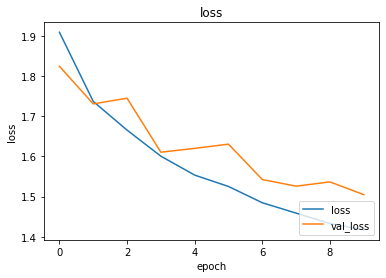

In [ ]:
# loss graph (DNN)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

<class 'PIL.Image.Image'>


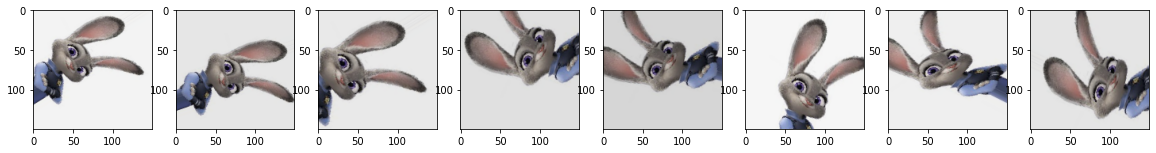

In [ ]:
# 4번
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 이미지 업로드
img = image.load_img('./sample_data/sample.jpg', target_size=(150, 150)) 
print(type(img))

# data 증강
datagen = ImageDataGenerator(rescale = 1./255,
    rotation_range=90, brightness_range=[0.8, 1.0],
    width_shift_range=0.2, zoom_range=[0.8, 1.2],
    height_shift_range=0.2)

# 이미지 -> array
x = image.img_to_array(img) # x.shape = (150, 150, 3)
x = x.reshape((1,) + x.shape) # x.shape = (1, 150, 150, 3) -> batch, w, h, channel(rgb)

# data 증강 사용(8장 변형)
obj = datagen.flow(x, batch_size=1)
fig = plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1) # why 1번 index부터 시작...?
    image = obj.next()
    plt.imshow(image[0])